In [1]:
##https://www.kaggle.com/mlg-ulb/creditcardfraud
import pandas as pd

In [ ]:
# https://www.kaggle.com/code/tawejssh/american-express-default-prediction/data?select=train_data.csv

In [ ]:
df=pd.read_csv('data/american_express/train_data.csv')
df.head()

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
%matplotlib inline

<AxesSubplot:>

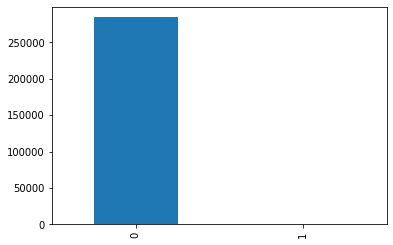

In [7]:
pd.value_counts(df['Class']).plot.bar()

In [10]:
### Intitially
# Step1 -We Will Create an ANN and solve this problem(ROC AUC) 
# Step2- We will use some Weights handling techniques to solve this imbalanced then we create The ANN

In [9]:
len(df.columns)

31

In [11]:
X=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [12]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [16]:
##Step1
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [17]:
print(len(X.columns))
n_inputs=29

29


In [18]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 4s 542us/step - loss: 0.0660
Epoch 2/10
6231/6231 [==============================] - 3s 496us/step - loss: 0.0237
Epoch 3/10
6231/6231 [==============================] - 3s 491us/step - loss: 0.0096
Epoch 4/10
6231/6231 [==============================] - 3s 515us/step - loss: 0.0083
Epoch 5/10
6231/6231 [==============================] - 3s 523us/step - loss: 0.0108
Epoch 6/10
6231/6231 [==============================] - 3s 497us/step - loss: 0.0088
Epoch 7/10
6231/6231 [==============================] - 3s 501us/step - loss: 0.0102
Epoch 8/10
6231/6231 [==============================] - 3s 556us/step - loss: 0.0163
Epoch 9/10
6231/6231 [==============================] - 3s 504us/step - loss: 0.0123
Epoch 10/10
6231/6231 [==============================] - 3s 480us/step - loss: 0.0138


In [19]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

0.8973776546852579


Weighted Neural Network With Keras

Define Weights
Fit the model with thos specific weights

In [20]:
weights_assigned={0:1,1:550}

In [21]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 4s 574us/step - loss: 6.5162
Epoch 2/10
6231/6231 [==============================] - 3s 544us/step - loss: 3.1014
Epoch 3/10
6231/6231 [==============================] - 3s 528us/step - loss: 4.3157
Epoch 4/10
6231/6231 [==============================] - 4s 580us/step - loss: 3.0836
Epoch 5/10
6231/6231 [==============================] - 3s 526us/step - loss: 3.9109
Epoch 6/10
6231/6231 [==============================] - 3s 524us/step - loss: 2.7162
Epoch 7/10
6231/6231 [==============================] - 3s 525us/step - loss: 2.2269
Epoch 8/10
6231/6231 [==============================] - 3s 524us/step - loss: 3.4470
Epoch 9/10
6231/6231 [==============================] - 3s 524us/step - loss: 1.3221
Epoch 10/10
6231/6231 [==============================] - 3s 524us/step - loss: 2.6699


In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
roc_auc_score(y_test,y_pred)

0.9660586176984305